In [45]:
import numpy as np
from numpy import array, zeros

from scipy.fftpack import dct, idct

import cv2
import matplotlib.pyplot as plt

In [46]:
class DCT_DETECT(object):
    
    def __init__(self):
        pass

    def main(self, img):
        rgb_img = self.BGR2RGB(img)
        padd_img = self.ZeroPad(rgb_img)
        blocks_img = self.Split2Blocks(padd_img)
        dct_blocks = self.DctBlocks(blocks_img)
        blocks_zigzag_result = self.BlocksZigZag(dct_blocks)
        beta_result = self.BetaEstimate(blocks_zigzag_result)
        return beta_result

    def BGR2RGB(self, img):
        return img[:,:,::-1]
    
    def ZeroPad(self, img):
        height = img.shape[0]
        width = img.shape[1]
        # padding image to (8 \times c1, 8 \times c2)
        new_height = height + (8 - (height % 8))
        new_width = width + (8 - (width % 8))
        result = zeros((new_height, new_width, 3), dtype=np.uint8)
        result[:height,:width,:] = img
        return result

    def Split2Blocks(self, img):
        yLen = img.shape[0] // 8
        xLen = img.shape[1] // 8
        blocks = zeros((yLen, xLen, 8, 8, 3), dtype=np.uint8)
        for y in range(yLen):
            for x in range(xLen):
                blocks[y][x] = img[y*8:(y+1)*8, x*8:(x+1)*8]
        return array(blocks)


    def DctBlocks(self, blocks):
        xLen = blocks.shape[1]
        yLen = blocks.shape[0]
        result = zeros((yLen, xLen, 8, 8, 3))
        for y in range(yLen):
            for x in range(xLen):
                d = zeros((8, 8, 3))
                for i in range(3):
                    block = blocks[y][x][:,:,i]
                    d[:,:,i] = dct(dct(block.T, norm = 'ortho').T, norm = 'ortho')
                result[y][x] = d
        return result

    def ZigZag(self, block):
        lines=[[] for i in range(8+8-1)]
        for y in range(8):
            for x in range(8):
                i = y + x
                if(i % 2 == 0):
                    lines[i].insert(0, block[y][x])
                else:
                    lines[i].append(block[y][x])
        return array([coefficient for line in lines for coefficient in line])

    def BlocksZigZag(self, blocks):
        xLen = blocks.shape[1]
        yLen = blocks.shape[0]
        zz = zeros(xLen * yLen * 3, dtype=object)
        for y in range(yLen):
            for x in range(xLen):
                for i in range(3):
                    zz[y * xLen * 3 + x * 3 + i] = self.ZigZag(blocks[y,x,:,:,i])
        return zz

    def BetaEstimate(self, blocks_zigzag_result):
        return np.abs(np.stack(blocks_zigzag_result)).mean(axis=0)[1:] # only return AC


In [2]:
im = cv2.imread("test_img.png")

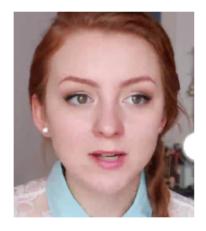

In [3]:
plt.imshow(im[:,:,::-1])
plt.axis("off")
plt.show()

In [47]:
my_dct_detect = DCT_DETECT()

In [48]:
my_dct_detect.main(im)

array([99.16409415, 63.20899052, 33.64582244, 16.92036419, 28.76345549,
       28.87088312, 10.32370992,  8.83023872, 21.22042196, 12.36599248,
        4.60413701,  6.01589292,  6.11296491,  9.03177498, 16.68994617,
        3.68531304,  3.79468126,  3.29318828,  2.93141734, 11.96393925,
       10.00375218,  1.91275857,  2.11750413,  2.69417019,  2.58463605,
        2.58144663,  6.77370076, 11.28691205,  1.65304105,  1.93815516,
        1.78001525,  1.65121464,  1.45110022,  1.35669384,  5.87650705,
        0.86290594,  0.96616482,  1.15303446,  1.2354664 ,  1.30059211,
        1.20023189,  1.24964015,  0.83855472,  0.89098203,  0.99948378,
        0.79546487,  0.78993093,  0.67595899,  0.54950364,  0.57476152,
        0.6877889 ,  0.69917607,  0.67513955,  0.57749158,  0.48132569,
        0.49645968,  0.43751037,  0.37522642,  0.3820156 ,  0.41721297,
        0.3577623 ,  0.32046475,  0.28089578])